# Approche Deep Learning

Nous proposons une approche élégante en utilisant les réseaux de neurones convolutionnels directements appliqués aux images issues des plot des landmarks.
Cette approche élégante sera conduite de manière la plus optimisée possible.

Il y a aura  deux types d'images :
- les plot avec des points noirs
- les plot avec les points colorés délimitant les différentes zones du visage (annotation manuelle des images)

Ce notebook comprendra une approche directe (pas d'augmentation, pas/peu d'optimisation d'hyperparametres) et un approche avancée (data augmentation, architecture optimisée) et si le temps le permet du fine tuning ou transfert learning vers d'autres backbones plus avancés.

## Librairies

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# DATA IS IN BLACK AND WHITE
### Data generation and preprocessing
## NO DATA AUGMENTATION

In [3]:
#### SUPER IMPORTANT TO EXECUTE OTHERWISE FACES MIGHT BE RGB
import save_face_img

save_face_img.create_faces(color_mode="bw")

100%|██████████| 353/353 [01:01<00:00,  5.73it/s]


<Figure size 640x480 with 0 Axes>

In [4]:
# Data Preparation NO AUGMENTATION
train_datagen =         ImageDataGenerator(rescale=1./255)
test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator =       train_datagen.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 295 images belonging to 6 classes.
Found 20 images belonging to 6 classes.


### Building / Compiling / Fitting model

In [5]:
# Model Building
model =     Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
from keras.callbacks import EarlyStopping

pat = 5 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

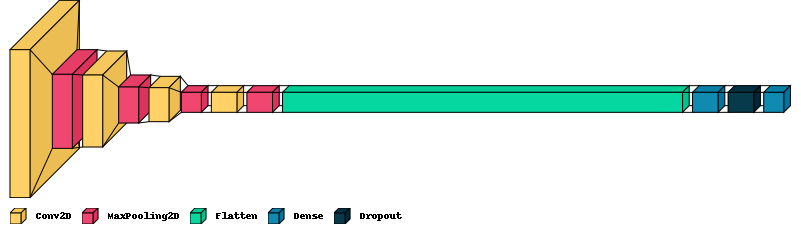

In [7]:
import visualkeras
visualkeras.layered_view(model, legend=True, scale_xy=1)

### Fitting model

In [8]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=early_stopping) 

Epoch 1/100
10/10 [==============================] - 9s 672ms/step - loss: 1.8025 - accuracy: 0.2271 - val_loss: 1.7479 - val_accuracy: 0.2500
Epoch 2/100
10/10 [==============================] - 6s 597ms/step - loss: 1.7816 - accuracy: 0.2475 - val_loss: 1.7330 - val_accuracy: 0.2500
Epoch 3/100
10/10 [==============================] - 6s 568ms/step - loss: 1.7670 - accuracy: 0.2271 - val_loss: 1.7625 - val_accuracy: 0.2500
Epoch 4/100
10/10 [==============================] - 6s 597ms/step - loss: 1.7604 - accuracy: 0.2712 - val_loss: 1.7187 - val_accuracy: 0.2500
Epoch 5/100
10/10 [==============================] - 6s 586ms/step - loss: 1.7425 - accuracy: 0.2780 - val_loss: 1.7150 - val_accuracy: 0.2500
Epoch 6/100
10/10 [==============================] - 7s 712ms/step - loss: 1.7448 - accuracy: 0.2576 - val_loss: 1.7159 - val_accuracy: 0.2500
Epoch 7/100
10/10 [==============================] - 7s 642ms/step - loss: 1.6917 - accuracy: 0.2814 - val_loss: 1.5650 - val_accuracy: 0.4500

In [9]:
# model.save('emotion_classifier_model.h5')  

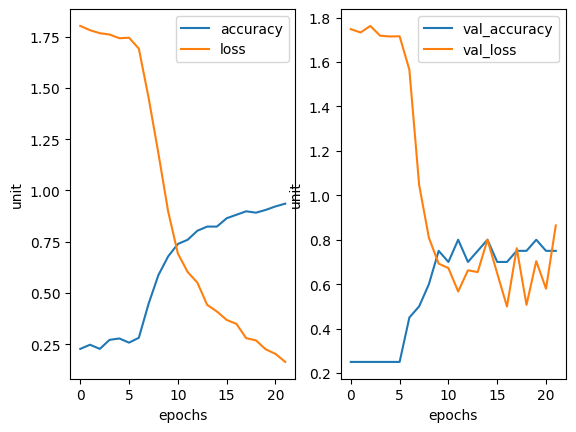

In [10]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['loss'], label='loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()



In [11]:
test_datagen =          ImageDataGenerator(rescale=1./255)

test_generator =        test_datagen.flow_from_directory(
                        r'../CK+_lands/images/test/',
                        target_size=(150, 150),
                        batch_size=1,
                        class_mode='categorical')

evaluation =            model.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 10 images belonging to 6 classes.
10/10 [==============================] - 0s 15ms/step - loss: 0.7211 - accuracy: 0.9000
Test Loss: 0.7211422920227051
Test Accuracy: 0.8999999761581421


## WITH DATA AUGMENTATION

In [12]:
# Data Preparation and augmentation
train_datagen_augmented =         ImageDataGenerator(rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        rotation_range=15,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1)

test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator_augmented =       train_datagen_augmented.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 295 images belonging to 6 classes.
Found 20 images belonging to 6 classes.


In [13]:
# Model Building
model2 =     Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='softmax'))

# Compilation
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [14]:
history = model2.fit(train_generator_augmented, epochs=100, validation_data=validation_generator) 

Epoch 1/100
10/10 [==============================] - 10s 748ms/step - loss: 1.9969 - accuracy: 0.2305 - val_loss: 1.7293 - val_accuracy: 0.2500
Epoch 2/100
10/10 [==============================] - 7s 695ms/step - loss: 1.7654 - accuracy: 0.2102 - val_loss: 1.7572 - val_accuracy: 0.2500
Epoch 3/100
10/10 [==============================] - 7s 697ms/step - loss: 1.7659 - accuracy: 0.2542 - val_loss: 1.7326 - val_accuracy: 0.2500
Epoch 4/100
10/10 [==============================] - 7s 689ms/step - loss: 1.7544 - accuracy: 0.2610 - val_loss: 1.7324 - val_accuracy: 0.2500
Epoch 5/100
10/10 [==============================] - 7s 702ms/step - loss: 1.7490 - accuracy: 0.2542 - val_loss: 1.7275 - val_accuracy: 0.2500
Epoch 6/100
10/10 [==============================] - 7s 701ms/step - loss: 1.7432 - accuracy: 0.2475 - val_loss: 1.7267 - val_accuracy: 0.2500
Epoch 7/100
10/10 [==============================] - 7s 711ms/step - loss: 1.7467 - accuracy: 0.2407 - val_loss: 1.7333 - val_accuracy: 0.250

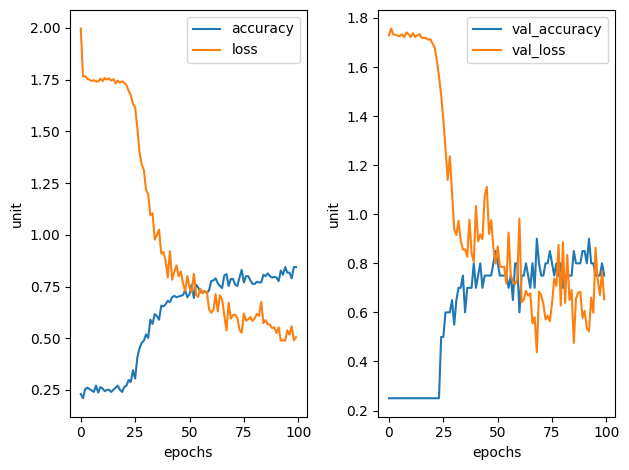

In [15]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['loss'], label='loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.tight_layout()



In [16]:
test_datagen =          ImageDataGenerator(rescale=1./255)

test_generator =        test_datagen.flow_from_directory(
                        r'../CK+_lands/images/test/',
                        target_size=(150, 150),
                        batch_size=1,
                        class_mode='categorical')

evaluation =            model2.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 10 images belonging to 6 classes.
10/10 [==============================] - 0s 16ms/step - loss: 0.2725 - accuracy: 0.9000
Test Loss: 0.2724902927875519
Test Accuracy: 0.8999999761581421


# DATA HAS COLORED ZONES (cf report figs)

In [17]:
#### SUPER IMPORTANT TO EXECUTE OTHERWISE FACES MIGHT BE B&W
import save_face_img

save_face_img.create_faces(color_mode="rgb")

100%|██████████| 353/353 [02:08<00:00,  2.74it/s]


<Figure size 640x480 with 0 Axes>

In [18]:
# Data Preparation NO AUGMENTATION
train_datagen =         ImageDataGenerator(rescale=1./255)
test_datagen =          ImageDataGenerator(rescale=1./255)

train_generator =       train_datagen.flow_from_directory(
                        r'../CK+_lands/images/train/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

validation_generator =  test_datagen.flow_from_directory(
                        r'../CK+_lands/images/val/',
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='categorical')

Found 295 images belonging to 6 classes.
Found 20 images belonging to 6 classes.


In [29]:
# Model Building
model3 =     Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='softmax'))

# Compilation
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [31]:
from keras.callbacks import EarlyStopping

pat = 10 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

In [32]:
history = model3.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=early_stopping) 

Epoch 1/100
10/10 [==============================] - 6s 685ms/step - loss: 1.7610 - accuracy: 0.2678 - val_loss: 1.7396 - val_accuracy: 0.2500
Epoch 2/100
10/10 [==============================] - 7s 655ms/step - loss: 1.7518 - accuracy: 0.2508 - val_loss: 1.7467 - val_accuracy: 0.2500
Epoch 3/100
10/10 [==============================] - 6s 630ms/step - loss: 1.7600 - accuracy: 0.2542 - val_loss: 1.7270 - val_accuracy: 0.2500
Epoch 4/100
10/10 [==============================] - 6s 630ms/step - loss: 1.7477 - accuracy: 0.2678 - val_loss: 1.7297 - val_accuracy: 0.2500
Epoch 5/100
10/10 [==============================] - 7s 695ms/step - loss: 1.7256 - accuracy: 0.2644 - val_loss: 1.7036 - val_accuracy: 0.2500
Epoch 6/100
10/10 [==============================] - 6s 609ms/step - loss: 1.6989 - accuracy: 0.3186 - val_loss: 1.6171 - val_accuracy: 0.2500
Epoch 7/100
10/10 [==============================] - 6s 597ms/step - loss: 1.5465 - accuracy: 0.3559 - val_loss: 1.2975 - val_accuracy: 0.4500

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['loss'], label='loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('unit')
plt.legend()
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.tight_layout()



In [23]:
test_datagen =          ImageDataGenerator(rescale=1./255)

test_generator =        test_datagen.flow_from_directory(
                        r'../CK+_lands/images/test/',
                        target_size=(150, 150),
                        batch_size=1,
                        class_mode='categorical')

evaluation =            model3.evaluate(test_generator)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 10 images belonging to 6 classes.
10/10 [==============================] - 0s 17ms/step - loss: 1.7381 - accuracy: 0.3000
Test Loss: 1.7380740642547607
Test Accuracy: 0.30000001192092896


## Model tuning via GridSearch

In [24]:
#libs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [25]:
#create model
def create_model(activation='relu'):
    # for computational purposes we will use a very simple model
    model3 =     Sequential()
    model3.add(Conv2D(32, kernel_size=(3, 3), activation=activation,vinput_shape=(150, 150, 3)))
    model3.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
    model3.add(Flatten())
    model3.add(Dense(256, activation=activation))
    model3.add(Dropout(0.5))
    model3.add(Dense(6, activation='softmax'))

    # Compilation
    model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model3

In [26]:
import tqdm
batch_size = 1
X_train, y_train = next(train_generator)
X_val, y_val = next(validation_generator)
for i in tqdm.tqdm(range(int(train_generator.n/batch_size)-1)): 
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
for i in tqdm.tqdm(range(int(validation_generator.n/1)-1)): 
  img, label = next(validation_generator)
  X_val = np.append(X_val, img, axis=0 )
  y_val = np.append(y_val, label, axis=0)


100%|██████████| 19/19 [00:02<00:00,  7.13it/s]


In [27]:
## TOO LONG AND VERSION ISSUES WITH SCIKERAS AND PYTHON 8.
# model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0, callbacks=early_stopping)
# # define the grid search parameters
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(model__activation=activation)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))